In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

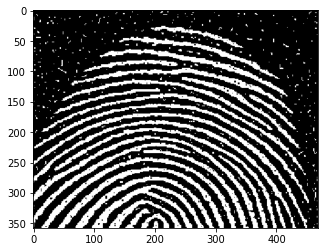

In [15]:
img=cv2.imread('images/morph1.png',0)
plt.imshow(img,cmap='gray')
plt.show()

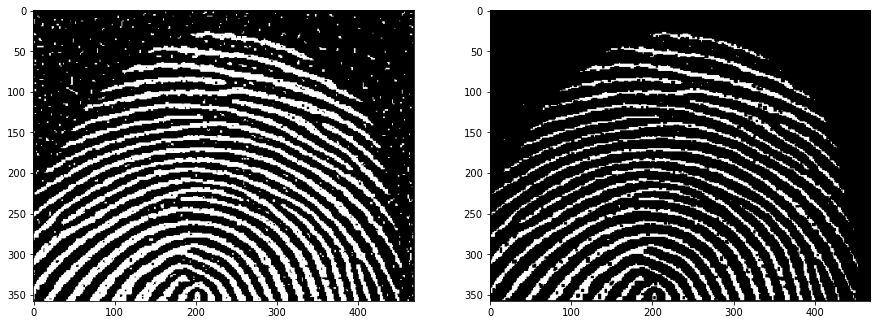

In [23]:
######                       EROSION                        #####

def erosion(img,si):
    si=si*255
    img_pad=np.zeros((img.shape[0]+2,img.shape[1]+2),dtype=np.uint8)
    img_pad[1:img.shape[0]+1,1:img.shape[1]+1]=img
    img_er=np.zeros(img.shape,dtype=np.uint8)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            res=(img_pad[i:i+3,j:j+3] & si)
            res=(res==si)
            if False in res:
                img_er[i,j]=0
            else:
                img_er[i,j]=255
   
    return img_er

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(erosion(img,si),cmap='gray')
plt.show()


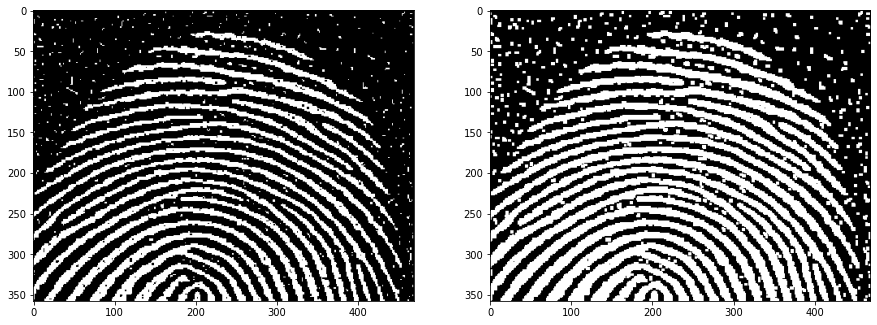

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)

In [17]:
######                       DILATION                        #####

def dilation(img,si):
    si=si*255
    img_pad=np.zeros((img.shape[0]+2,img.shape[1]+2),dtype=np.uint8)
    img_pad[1:img.shape[0]+1,1:img.shape[1]+1]=img
    img_di=np.zeros(img.shape,dtype=np.uint8)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            res=(img_pad[i:i+3,j:j+3] & si)
            res=(res==si)
            if True in res:
                img_di[i,j]=255
            else:
                img_di[i,j]=0
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img_di,cmap='gray')
    plt.show()
    return img_di

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
dilation(img,si)

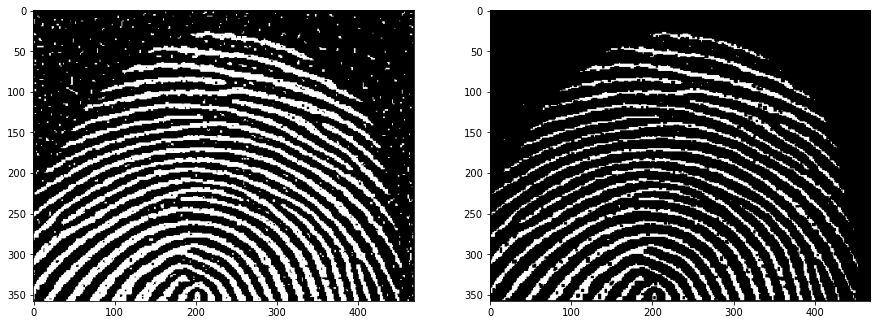

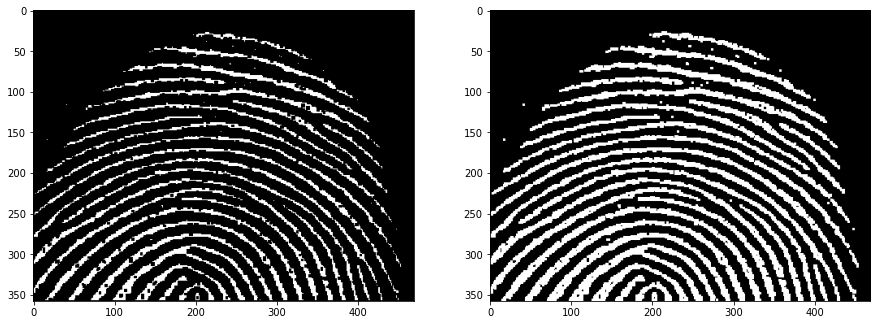

In [18]:
#######                       OPENNING                    ######

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
op=erosion(img,si)
op=dilation(op,si)

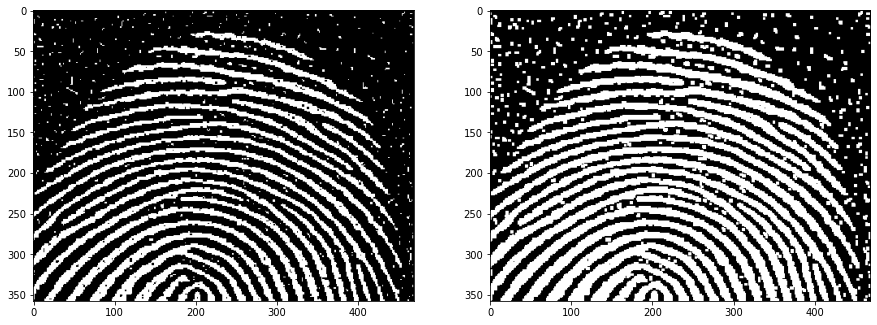

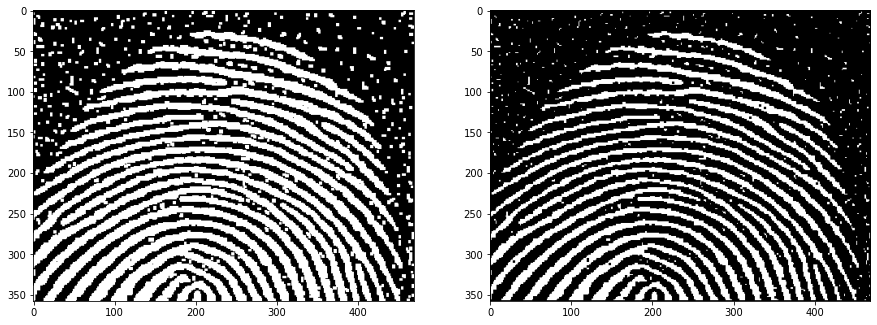

In [19]:
#######                       CLOSING                    ######

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
op=dilation(img,si)
op=erosion(op,si)

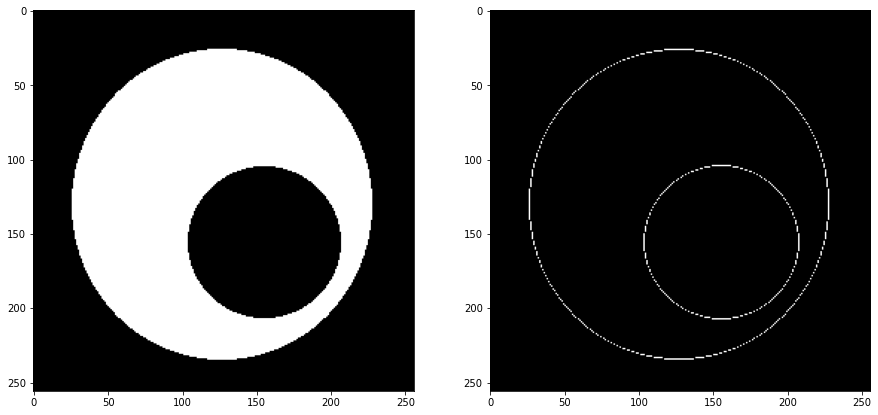

In [20]:
########## HIT AND MISS TRANSFORM   #######################
def con(m1,m2):
    for i in range(3):
        for j in range(3):
            if(m2[i,j]!=2):
                if(m2[i,j]!=m1[i,j]):
                    return False
    return True

def hitandmiss(img,se):
    img_pad=np.zeros((img.shape[0]+2,img.shape[1]+2),dtype=np.uint8)
    img_pad[1:img.shape[0]+1,1:img.shape[1]+1]=img+0
    img_res=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    img_tmp=img_res+0
    for k in range(len(se)):
        for i in range(0,img.shape[0]):
            for j in range(0,img.shape[1]):
                if(con(img_pad[i:i+3,j:j+3],se[k])==True):
                    img_tmp[i,j]=255
        img_res= img_res | img_tmp
    return img_res
se=[]
se.append(np.array([[2,255,2],[0,255,255],[0,0,2]],dtype=np.uint8))
se.append(np.array([[2,255,2],[255,255,0],[2,0,0]],dtype=np.uint8))
se.append(np.array([[2,0,0],[255,255,0],[2,255,2]],dtype=np.uint8))
se.append(np.array([[0,0,2],[0,255,255],[2,255,2]],dtype=np.uint8))  
se.append(np.array([[255,255,255],[255,255,255],[0,0,0]],dtype=np.uint8))
se.append(np.array([[0,0,0],[255,255,255],[255,255,255]],dtype=np.uint8))
se.append(np.array([[255,255,0],[255,255,0],[255,255,0]],dtype=np.uint8))
se.append(np.array([[0,255,255],[0,255,255],[0,255,255]],dtype=np.uint8))  
im=cv2.imread("images/art7.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hitandmiss(im,kernel),cmap='gray')
plt.show()

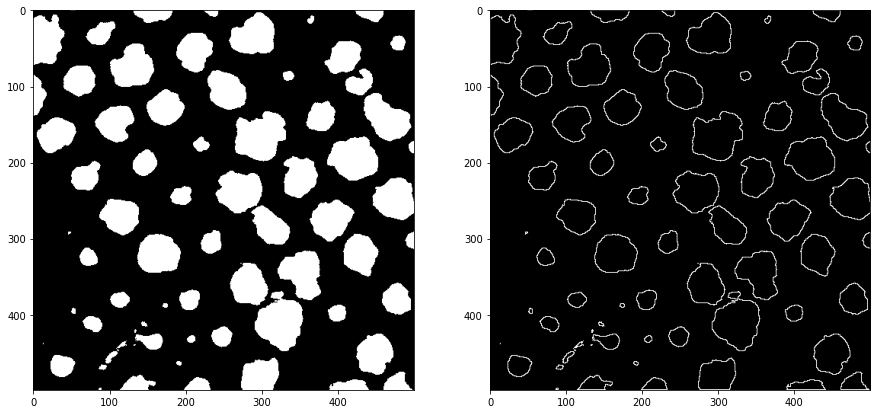

In [27]:
################### BOUNDARY EXTRACTION #######################3
def boundaryextraction(img,se):
    img_tmp=erosion(img,se)
    return img-img_tmp
se=np.array([[1,1,1],[1,1,1],[1,1,1]],dtype=np.uint8)
im=cv2.imread("images/morph.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(boundaryextraction(im,se),cmap='gray')
plt.show()

In [ ]:
##############